# Last Versian : V3

In [1]:
import datetime

x = datetime.datetime.now()
print(x)

2020-06-22 21:36:45.631669


# Demand Forecast Project

Data sources that will be used are as below:

1- Sales (3 Years history + ongoing) 
2- Product attributes 
3- Holiday

## Demand Forecast generated for 12-16 weeks out will have below dimensions:

Subclass:

Demand Forecast generated for 12-16 weeks out will have below dimensions:

1- Subclass

2- First 3 digits of zip (Digital)

3- Fiscal weeks

4- Loc ID for Walk IN - optional 

5- Holiday - Y/ N - To indicate if the fiscal week had a major US holiday or not

6- Fulfillment types 
    + BOPUS (webex and common)
    + BOSS (webex and common)
    + STH (webex and common)
    + DSV (webex and common)
    + Walk In

7- Product granularity (TBD)



- Frequency of this demand forecast: Weekly

What will it be compared against for gauging? 

Celect

Actuals TY

Method Sales?? - subclass / week (Actuals LY)

![](cover_1600px_web-1280x640.jpg)

# Add Require Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [ ]:
# !unzip Archive.zip

# Concat multiple file csv to one file

In [3]:
path = '.'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename , index_col=None , header = 0)
    li.append(df)

data=pd.concat(li , axis = 0 , ignore_index=True)

In [4]:
data.shape

(13550664, 10)

# Read data from disk

In [8]:
data['is_holiday'].value_counts().head(8)

0    12740756
1      280672
2      151586
3       91403
4       61147
5       42501
6       30705
7       23187
Name: is_holiday, dtype: int64

In [9]:
data['is_holiday'] = data[['is_holiday']].applymap(lambda x: 1 if x > 1 else 0)
data.is_holiday.value_counts()

0    13021428
1      529236
Name: is_holiday, dtype: int64

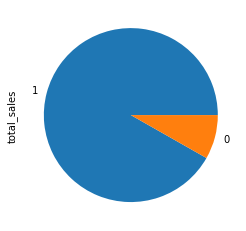

In [32]:
data.groupby("is_holiday").total_sales.mean().sort_values(ascending=False)[:5].plot.pie()

Text(0, 0.5, 'Total_sales')

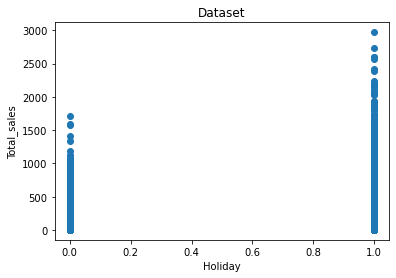

In [11]:
import matplotlib.pyplot as plt

# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(data['is_holiday'], data['total_sales'])
# set a title and labels
ax.set_title('Dataset')
ax.set_xlabel('Holiday')
ax.set_ylabel('Total_sales')

# Convert beginning_of_week to readable for model

In [12]:
print("Min data from dataset:" , data['beginning_of_week'].min())
print("MAX data from dataset:" , data['beginning_of_week'].max())

Min data from dataset: 2018-09-02
MAX data from dataset: 2020-06-14


In [13]:
import datetime
import pandas as pd
# make the new columns using string indexing
data['year'] = data['beginning_of_week'].str[0:4].astype(int)
data['month'] = data['beginning_of_week'].str[5:7].astype(int)
data['day'] = data['beginning_of_week'].str[8:10].astype(int)
data['quarter']=pd.to_datetime(data['beginning_of_week']).dt.quarter
data['smester']=np.where(data.quarter.isin([1,2]), 1 , 2)
data['day_of_year']=pd.to_datetime(data['beginning_of_week']).dt.dayofyear
data['week_of_year']=pd.to_datetime(data.beginning_of_week).dt.weekofyear
data['day_in_Month']=pd.to_datetime(data['beginning_of_week']).dt.days_in_month

In [19]:
list(data)

['total_sales',
 'total_revenue',
 'advertised_purchases',
 'is_holiday',
 'node',
 'dept_nbr',
 'cl_nbr',
 'sub_cl_nbr',
 'subclass_id',
 'beginning_of_week',
 'year',
 'month',
 'day',
 'quarter',
 'smester',
 'day_of_year',
 'week_of_year',
 'day_in_Month']

In [17]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(data['month'], data['total_sales'])
# set a title and labels
ax.set_title('Dataset')
ax.set_xlabel('month')
ax.set_ylabel('Total_sales')

Text(0, 0.5, 'Total_sales')

In [14]:
data['day_of_year'].value_counts().head(6)

364    144156
124    144156
90     144156
96     144156
97     144156
103    144156
Name: day_of_year, dtype: int64

In [15]:
# import platform,socket,re,uuid,json,psutil,logging

# def getSystemInfo():
#     try:
#         info={}
#         info['platform']=platform.system()
#         info['platform-release']=platform.release()
#         info['platform-version']=platform.version()
#         info['architecture']=platform.machine()
#         info['hostname']=socket.gethostname()
#         info['ip-address']=socket.gethostbyname(socket.gethostname())
#         info['mac-address']=':'.join(re.findall('..', '%012x' % uuid.getnode()))
#         info['processor']=platform.processor()
#         info['ram']=str(round(psutil.virtual_memory().total / (1024.0 **3)))+" GB"
#         return json.dumps(info)
#     except Exception as e:
#         logging.exception(e)

# json.loads(getSystemInfo())

# CHECK MISSING VALUE

In [16]:
data.isnull().sum()

total_sales             0
total_revenue           0
advertised_purchases    0
is_holiday              0
node                    0
dept_nbr                0
cl_nbr                  0
sub_cl_nbr              0
subclass_id             0
beginning_of_week       0
year                    0
month                   0
day                     0
quarter                 0
smester                 0
day_of_year             0
week_of_year            0
day_in_Month            0
dtype: int64

# channel Label Encoder

In [14]:
from sklearn import preprocessing 
def encoding(col):
    label_encod = preprocessing.LabelEncoder()
    data[col] = label_encod.fit_transform(data[col])
    return data[col].value_counts()

# encoding('channel')
encoding('day_of_year')
encoding('year')

    
# WALK-IN = 0
# webex_and_common = 1

1    7496112
2    3459744
0    2594808
Name: year, dtype: int64

# Convert subclass_id without dash on the data

In [15]:
# make string version of original column, call it 'col'
data['subclass_id'] = data['subclass_id'].str.replace(r'-', '').astype(int)
data['subclass_id'].head()

0    151010
1    151010
2    151010
3    151010
4    151010
Name: subclass_id, dtype: int64

In [16]:
data.describe().T

count          mean           std        min  \
total_sales           13550664.0  5.659553e+00  2.357952e+01       0.00   
total_revenue         13550664.0  3.437848e+01  1.229455e+02   -1526.76   
advertised_purchases  13550664.0  3.785171e+00  1.403406e+01       0.00   
is_holiday            13550664.0  3.905609e-02  1.937285e-01       0.00   
node                  13550664.0  7.630657e+02  4.795945e+02       7.00   
dept_nbr              13550664.0  2.081707e+02  2.543211e+02      15.00   
cl_nbr                13550664.0  4.739837e+01  2.517701e+01      10.00   
sub_cl_nbr            13550664.0  5.140650e+01  2.538735e+01      10.00   
subclass_id           13550664.0  2.086499e+06  2.542934e+06  151010.00   
year                  13550664.0  1.063830e+00  6.653828e-01       0.00   
month                 13550664.0  6.500000e+00  3.622477e+00       1.00   
day                   13550664.0  1.551064e+01  8.837475e+00       1.00   
quarter               13550664.0  2.468085e+00  1.164201e+00       1.00   
smester               13550664.0  1.468085e+00  4.989804e-01       1.00   
day_of_year           13550664.0  4.650000e+01  2.713393e+01       0.00   
week_of_year          13550664.0  2.618085e+01  1.572501e+01       1.00   
day_in_Month          13550664.0  3.043617e+01  7.657358e-01      28.00   

                            25%       50%         75%        max  
total_sales                0.00       0.0        1.00     2972.0  
total_revenue              0.00       0.0        5.99    11802.5  
advertised_purchases       0.00       0.0        1.00      736.0  
is_holiday                 0.00       0.0        0.00        1.0  
node                     368.75     688.5     1167.25     6666.0  
dept_nbr                  15.00      15.0      543.00      543.0  
cl_nbr                    20.00      50.0       70.00       90.0  
sub_cl_nbr                27.00      54.0       74.00       99.0  
subclass_id           154041.00  158080.0  5433033.00  5438082.0  
year                       1.00       1.0        2.00        2.0  
month                      3.00       6.0       10.00       12.0  
day                        8.00      15.5       23.00       31.0  
quarter                    1.00       2.0        4.00        4.0  
smester                    1.00       1.0        2.00        2.0  
day_of_year               23.00      46.5       70.00       93.0  
week_of_year              12.00      24.0       41.00       52.0  
day_in_Month              30.00      31.0       31.00       31.0

In [17]:
# data['total_sales_one_day_prev'] = data.shift(1)

In [18]:
# Group by month in this case "date_block_num" and aggregate features.
data_preprocess = data.sort_values('beginning_of_week').groupby([ 'is_holiday',
 'node',
 'dept_nbr',
 'cl_nbr',
 'sub_cl_nbr',
 'subclass_id',
    'beginning_of_week'   ,                                                          
 'year',
 'month',
 'day',
 'quarter',
 'smester',
 'day_of_year',
 'week_of_year',
 'day_in_Month']
 , as_index=False)

In [19]:
# 'total_sales',
#  'total_revenue',
#  'advertised_purchases',

In [20]:
data_preprocess = data_preprocess.agg({'advertised_purchases':['sum' , 'mean' , 'max' , 'min' ] ,
                                       'total_revenue':['sum' , 'mean' , 'max' , 'min' ] ,
                                       'total_sales':['sum' , 'mean' , 'max' , 'min', 'count' ]})

In [21]:
data_preprocess.columns = [ 'is_holiday', 'node', 'dept_nbr', 'cl_nbr', 'sub_cl_nbr', 'subclass_id', 'beginning_of_week' ,
                           'year', 'month', 'day', 'quarter', 'smester', 'day_of_year', 'week_of_year', 'day_in_Month',
                           "advertised_purchases.sum" , "advertised_purchases.mean", "advertised_purchases.max", "advertised_purchases.min",
                            "total_revenue.sum" , "total_revenue.mean", "total_revenue.max", "total_revenue.min",
                            "total_sales.sum" , "total_sales.mean", "total_sales.max", "total_sales.min" , "total_sales.count"
]

In [ ]:
# data_preprocess[[ "total_sales.sum" , "total_sales.mean", "total_sales.max", "total_sales.min" , "total_sales.count"]].head(50)

In [22]:
# Min value
f_min = lambda x: x.rolling(window=3, min_periods=1).min()
# Max value
f_max = lambda x: x.rolling(window=3, min_periods=1).max()
# Mean value
f_mean = lambda x: x.rolling(window=3, min_periods=1).mean()
# Standard deviation
f_std = lambda x: x.rolling(window=3, min_periods=1).std()


function_list = [f_min, f_max, f_mean, f_std]
function_name = ['min', 'max', 'mean', 'std']


for i in range(len(function_list)):
    data_preprocess[('total_sales_count_%s' % function_name[i])] = data_preprocess.sort_values('beginning_of_week').groupby([
        'node', 'dept_nbr', 'cl_nbr', 'sub_cl_nbr'])['total_sales.count'].apply(function_list[i])


In [23]:
# Fill the empty std features with 0
data_preprocess['total_sales_count_std'].fillna(0, inplace=True)

# Remove unuse column 

In [25]:
del  data_preprocess['dept_nbr'] , data_preprocess['sub_cl_nbr'] ,data_preprocess['cl_nbr'] , data_preprocess['node']

In [31]:
del data_preprocess['subclass_id']

# Add need column from data

In [26]:
data_preprocess['advertised_purchases'] = data['advertised_purchases']

In [27]:
data_preprocess['total_revenue'] = data.total_revenue
data_preprocess['advertised_purchases'] = data.advertised_purchases

In [33]:
data_preprocess.describe().T

count       mean         std      min   25%  \
is_holiday                 13550664.0   0.039056    0.193728     0.00   0.0   
year                       13550664.0   1.063830    0.665383     0.00   1.0   
month                      13550664.0   6.500000    3.622477     1.00   3.0   
day                        13550664.0  15.510638    8.837475     1.00   8.0   
quarter                    13550664.0   2.468085    1.164201     1.00   1.0   
smester                    13550664.0   1.468085    0.498980     1.00   1.0   
day_of_year                13550664.0  46.500000   27.133928     0.00  23.0   
week_of_year               13550664.0  26.180851   15.725006     1.00  12.0   
day_in_Month               13550664.0  30.436170    0.765736    28.00  30.0   
advertised_purchases.sum   13550664.0   3.785171   14.034058     0.00   0.0   
advertised_purchases.mean  13550664.0   3.785171   14.034058     0.00   0.0   
advertised_purchases.max   13550664.0   3.785171   14.034058     0.00   0.0   
advertised_purchases.min   13550664.0   3.785171   14.034058     0.00   0.0   
total_revenue.sum          13550664.0  34.378485  122.945536 -1526.76   0.0   
total_revenue.mean         13550664.0  34.378485  122.945536 -1526.76   0.0   
total_revenue.max          13550664.0  34.378485  122.945536 -1526.76   0.0   
total_revenue.min          13550664.0  34.378485  122.945536 -1526.76   0.0   
total_sales.sum            13550664.0   5.659553   23.579517     0.00   0.0   
total_sales.mean           13550664.0   5.659553   23.579517     0.00   0.0   
total_sales.max            13550664.0   5.659553   23.579517     0.00   0.0   
total_sales.min            13550664.0   5.659553   23.579517     0.00   0.0   
total_sales.count          13550664.0   1.000000    0.000000     1.00   1.0   
total_sales_count_min      13550664.0   1.000000    0.000000     1.00   1.0   
total_sales_count_max      13550664.0   1.000000    0.000000     1.00   1.0   
total_sales_count_mean     13550664.0   1.000000    0.000000     1.00   1.0   
total_sales_count_std      13550664.0   0.000000    0.000000     0.00   0.0   
advertised_purchases       13550664.0   3.785171   14.034058     0.00   0.0   
total_revenue              13550664.0  34.378485  122.945536 -1526.76   0.0   

                            50%    75%      max  
is_holiday                  0.0   0.00      1.0  
year                        1.0   2.00      2.0  
month                       6.0  10.00     12.0  
day                        15.5  23.00     31.0  
quarter                     2.0   4.00      4.0  
smester                     1.0   2.00      2.0  
day_of_year                46.5  70.00     93.0  
week_of_year               24.0  41.00     52.0  
day_in_Month               31.0  31.00     31.0  
advertised_purchases.sum    0.0   1.00    736.0  
advertised_purchases.mean   0.0   1.00    736.0  
advertised_purchases.max    0.0   1.00    736.0  
advertised_purchases.min    0.0   1.00    736.0  
total_revenue.sum           0.0   5.99  11802.5  
total_revenue.mean          0.0   5.99  11802.5  
total_revenue.max           0.0   5.99  11802.5  
total_revenue.min           0.0   5.99  11802.5  
total_sales.sum             0.0   1.00   2972.0  
total_sales.mean            0.0   1.00   2972.0  
total_sales.max             0.0   1.00   2972.0  
total_sales.min             0.0   1.00   2972.0  
total_sales.count           1.0   1.00      1.0  
total_sales_count_min       1.0   1.00      1.0  
total_sales_count_max       1.0   1.00      1.0  
total_sales_count_mean      1.0   1.00      1.0  
total_sales_count_std       0.0   0.00      0.0  
advertised_purchases        0.0   1.00    736.0  
total_revenue               0.0   5.99  11802.5

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def MIN_MAX_SCALE(col):
    X = data_preprocess[[col]].values # Modify to Numpy
    min_max_sc = preprocessing.MinMaxScaler()
    X_Scale = min_max_sc.fit_transform(X)
    data_preprocess[col] = pd.DataFrame(X_Scale) # add to pandas DB

# MIN_MAX_SCALE('zip3')
# MIN_MAX_SCALE('subclass_id')

In [ ]:
col=['is_holiday',
 'channel',
 'zip3',
 'subclass_id',
 'beginning_of_week',
 'year',
 'month',
 'day',
 'quarter',
 'smester',
 'day_of_week',
 'weekofyear',
 'advertised_purchases_sum',
 'advertised_purchases_mean',
 'total_sales_sum',
 'total_sales_count',
 'total_sales_mean',
 'advertised_purchases',
 'total_sales_count_min',
 'total_sales_count_max',
 'total_sales_count_mean',
 'total_sales_count_std',
 'item_cnt_shifted1',
 'item_cnt_shifted2',
 'item_cnt_shifted3',
 'item_trend' , 'total_sale'] # ->> Target
data_preprocess = data_preprocess.reindex(columns=col)

data_preprocess.describe().T

In [ ]:
print("Data Shape" , data_preprocess.shape)

In [ ]:
data_preprocess.to_csv("data_preprocess.csv" , index=False)

In [ ]:
"till here."

In [ ]:
# lag_list = [1, 2, 3]

# for lag in lag_list:
#     ft_name = ('item_cnt_shifted%s' % lag)
#     data_preprocess[ft_name] = data_preprocess.sort_values('beginning_of_week').groupby([ 
#         'zip3', 'subclass_id', 'channel'])['total_sale'].shift(lag)
#     # Fill the empty shifted features with 0
#     data_preprocess[ft_name].fillna(0, inplace=True)

In [ ]:
"Done"